# Disaggregation Data
This data was collected using Nikola's plug-level sensors (specifically sensor number 2).
- experiment 1: one device at a time
  + 3:30:14: sensor plugged into extension cord (no other devices)
  + 3:33:00: attach christmas lights to sensor directly
  + 3:35:08: unlug lights "a little late"
  + 3:36:00: attach iPhone 5S "partially charged"
  + 3:38:00: disconnect iPhone
  + 3:40:00: attach lamp (powered on)
  + 3:42:00: power off lamp
  + 3:44:00: power on lamp
  + 3:46:00: detach lamp from sensor
  + 3:48:03: attach microwave (off)
  + 3:50:01: power on microwave for two minutes
  + 3:52:01: power off microwave, leave attached
  + 3:54:01: END DATA COLLECTION
- experiment 2: power strip with various devices
  + 11:14:00: empty power strip plugged into sensor
  + 11:16:00: attach christmas lights to power strip
  + 11:18:00: attach iPhone 5S "zero battery life"
  + 11:20:00: detach christmas lights
  + 11:22:10: attach powered on lamp
  + 11:24:00: power off lamp
  + 11:26:00: attach christmas lights
  + 11:28:00: power on lamp
  + 11:30:00: disconnect iPhone "leave charger still attached"
  + 11:32:00: power off lamp
  + 11:34:00: unplug christmas lights
  + 11:36:00: disconnect lamp
  + 11:38:00: disconnect iPhone 5S charger
  + 11:40:00: END DATA COLLECTION
- experiment 3: moving a microwave to different outlets
  + 12:14:00: nothing attached
  + 12:16:00: plug microwave directly in
  + 12:18:00: plug microwave to adjacent outlet
  + 12:20:00: plug microwave to outlet on adjacent wall
  + 12:22:00: END DATA COLLECTION

In [2]:
# Imports
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.__version__

Populating the interactive namespace from numpy and matplotlib


'0.15.2'

In [8]:
# Read in data from csv file.
experiments = range(1,4)

dateparse = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

pieces = []
columns = ["time", "current", "power"]

for experiment in experiments:
    path = "15-01-25-experiment-{}/data.csv".format(experiment)
    frame = pd.read_csv(path, names=columns, parse_dates=[0], date_parser=dateparse)
    frame['experiment'] = experiment
    pieces.append(frame)

data = pd.concat(pieces, ignore_index=True)

In [9]:
data.head()

,time,current,power,experiment
0,2015-01-25 15:30:14,0.0076,3.2915,1
1,2015-01-25 15:30:14,0.0076,2.2881,1
2,2015-01-25 15:30:17,0.0114,2.8872,1
3,2015-01-25 15:30:19,0.0266,8.4914,1
4,2015-01-25 15:30:21,0.0152,3.8846,1


In [14]:
data.describe()

,current,power,experiment
count,1691.000000,1691.000000,1691.000000
mean,0.518766,157.837406,1.718510
std,1.761349,553.140064,0.685441
min,0.000000,0.000000,1.000000
25%,0.064500,17.681800,1.000000
50%,0.072100,22.114000,2.000000
75%,0.235300,66.597650,2.000000
max,10.759000,3704.792800,3.000000


In [16]:
grouped = data.groupby(data.experiment)

experiment
1             Axes(0.125,0.125;0.775x0.775)
2             Axes(0.125,0.125;0.775x0.775)
3             Axes(0.125,0.125;0.775x0.775)
dtype: object

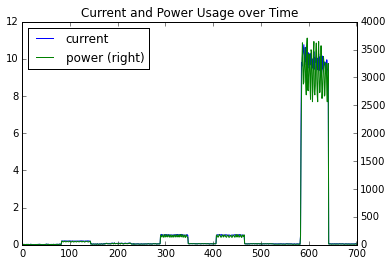

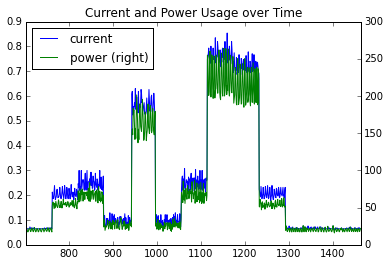

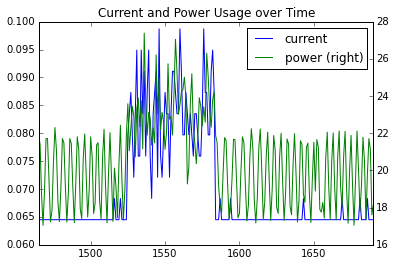

In [20]:
grouped.plot(title="Current and Power Usage over Time", secondary_y=['power'])

## Experiment 1
1. Determine average energy usage:
  - Christmas lights
  - iPhone charger
    + with iPhone
    + without iPhone
  - lamp
    + on
    + off
  - microwave
    + on
    + off